
# TASK2: PREDICTION USING UNSUPERVISED MACHINE LEARNING


> 


The aim of this task is to predict the optimum number of clusters from the 'Iris' dataset and represent it visually. 

### Author : Sai Sanjana T

Importing the dataset

In [1]:
#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

Loading the dataset

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


Finding the optimum number of clusters

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


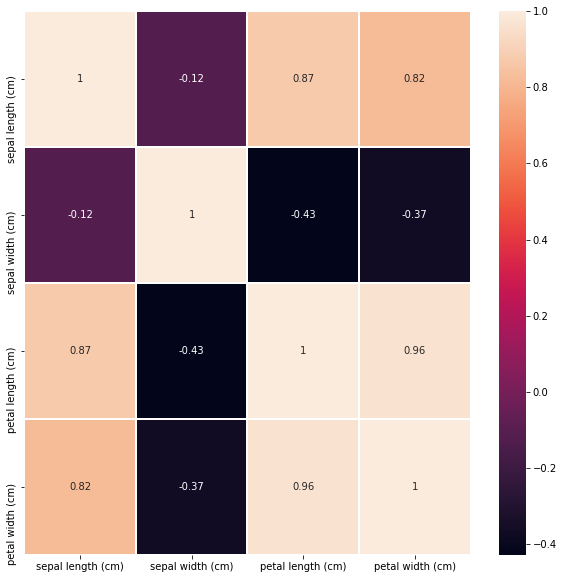

In [14]:
import seaborn as sns
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=1, annot=True)

<function matplotlib.pyplot.show>

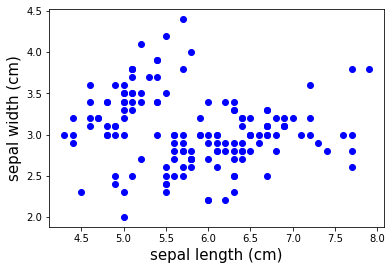

In [16]:
plt.scatter(x= 'sepal length (cm)', y='sepal width (cm)', data=df, color='b')
plt.xlabel('sepal length (cm)', fontsize=15)
plt.ylabel('sepal width (cm)', fontsize=15)
plt.show

<function matplotlib.pyplot.show>

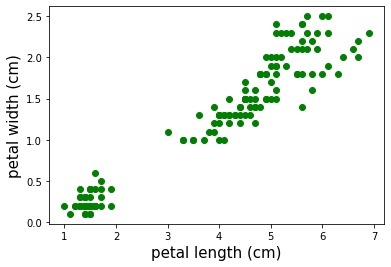

In [18]:
plt.scatter(x= 'petal length (cm)', y='petal width (cm)', data=df, color='g')
plt.xlabel('petal length (cm)', fontsize=15)
plt.ylabel('petal width (cm)', fontsize=15)
plt.show

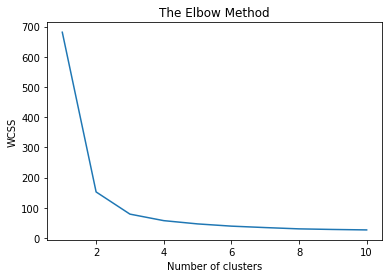

In [19]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In the elbow method the number clusters indicated are 3

Kmeans on data we have

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Visualizing clusters

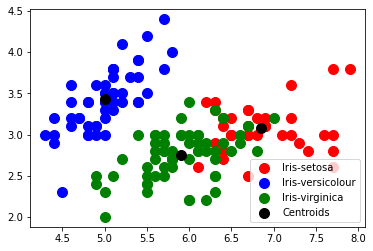

In [9]:
# Visualizing the clusters - On the first 2 columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# visualizing the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

Kmeans did a good job by predicting the correct number of clusters as 3 while Dendograms predicted 2 Clusters.